In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import nltk

## Loading the data

In [2]:
train_df = pd.read_csv('../input/train.csv')

In [3]:
train_df.shape

(1306122, 3)

## Missings

In [4]:
train_df.isna().sum()

qid              0
question_text    0
target           0
dtype: int64

In [5]:
train_df.head(5)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [6]:
len(train_df.qid.unique())

1306122

In [7]:
train_df.shape[0]

1306122

In [8]:
train_df['target'].value_counts(dropna=False)

0    1225312
1      80810
Name: target, dtype: int64

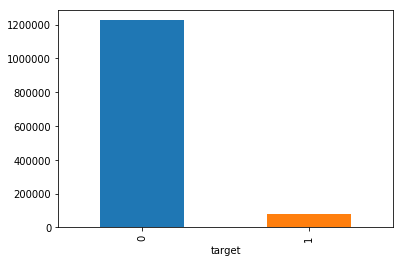

In [9]:
train_df.groupby('target').size().plot(kind='bar')

# Creating new features:
* number_sents -- number of sentences in the question text
* number_of_question_sents -- number of question sentences in the question text
* number_of_declarative_sents -- number of declarative sentences in the question text

In [10]:
train_df['sents_tokenize'] = train_df['question_text'].apply(lambda x: nltk.sent_tokenize(x))

### Creating number_sents

In [11]:
train_df['number_sents'] = train_df['sents_tokenize'].apply(len)

In [12]:
train_df['number_sents'].value_counts(dropna=False)

1     1163089
2      113262
3       23302
4        5173
5        1045
6         188
7          49
8          11
11          1
10          1
9           1
Name: number_sents, dtype: int64

c:\program files (x86)\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


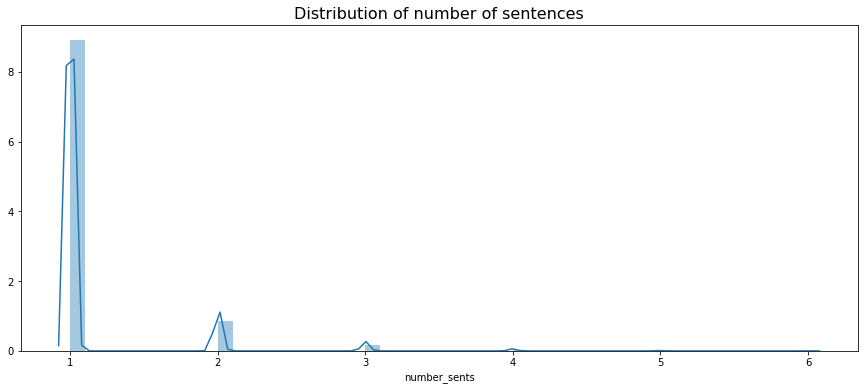

In [13]:
fig, ax = plt.subplots(figsize=(15,6))

ax.set_title("Distribution of number of sentences", fontsize=16)
ax.set_xlabel("Number of sentences")
sb.distplot(train_df.loc[train_df['number_sents'] < 7, 'number_sents'], ax=ax);

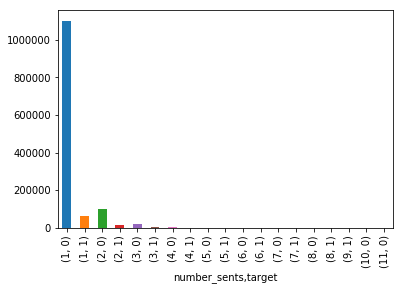

In [14]:
train_df.groupby(['number_sents', 'target'], as_index=False).size().plot(kind='bar')

In [15]:
train_df.groupby(['number_sents', 'target']).size()

number_sents  target
1             0         1100259
              1           62830
2             0           99536
              1           13726
3             0           20085
              1            3217
4             0            4371
              1             802
5             0             863
              1             182
6             0             154
              1              34
7             0              34
              1              15
8             0               8
              1               3
9             1               1
10            0               1
11            0               1
dtype: int64

### Creating number_of_question_sents

In [16]:
def get_sent_end_sign(sentences):
    return  dict(Counter(map(lambda x: x[-1], sentences)))

In [17]:
from collections import Counter
train_df['type_of_sents'] = train_df['sents_tokenize'].apply(get_sent_end_sign)

In [18]:
train_df['number_of_question_sents'] = train_df['type_of_sents'].apply(lambda x: x.get('?', 0))

In [19]:
train_df['number_of_question_sents'].value_counts()

1     1237480
2       61730
3        5227
0         946
4         630
5          89
6          14
7           3
8           2
10          1
Name: number_of_question_sents, dtype: int64

In [20]:
train_df.groupby(['number_of_question_sents', 'target']).size()

number_of_question_sents  target
0                         0             672
                          1             274
1                         0         1166234
                          1           71246
2                         0           53513
                          1            8217
3                         0            4305
                          1             922
4                         0             504
                          1             126
5                         0              69
                          1              20
6                         0              11
                          1               3
7                         0               2
                          1               1
8                         0               1
                          1               1
10                        0               1
dtype: int64

### Creating number_of_declaratice_sents

In [21]:
train_df['number_of_declarative_sents'] = train_df['type_of_sents'].apply(lambda x: x.get('.', 0))

In [22]:
train_df['number_of_declarative_sents'].value_counts()

0    1231256
1      58835
2      12789
3       2639
4        496
5         86
6         17
7          4
Name: number_of_declarative_sents, dtype: int64

In [23]:
train_df.groupby(['number_of_declarative_sents', 'target']).size()

number_of_declarative_sents  target
0                            0         1159579
                             1           71677
1                            0           51583
                             1            7252
2                            0           11320
                             1            1469
3                            0            2318
                             1             321
4                            0             419
                             1              77
5                            0              75
                             1              11
6                            0              14
                             1               3
7                            0               4
dtype: int64

In [24]:
train_df.isna().sum()

qid                            0
question_text                  0
target                         0
sents_tokenize                 0
number_sents                   0
type_of_sents                  0
number_of_question_sents       0
number_of_declarative_sents    0
dtype: int64

### Check for censor

In [29]:
train_df.loc[train_df['question_text'].str.contains('*', regex=False),'target'].value_counts()

0    624
1    136
Name: target, dtype: int64

In [30]:
train_df.loc[train_df['question_text'].str.contains('\s\w+[*].+?', regex=True),'target'].value_counts()

0    266
1     99
Name: target, dtype: int64

### View questions that contains "math" word

In [31]:
train_df.loc[train_df['question_text'].str.contains('math', regex=False), 'target'].value_counts()

0    6562
1     140
Name: target, dtype: int64